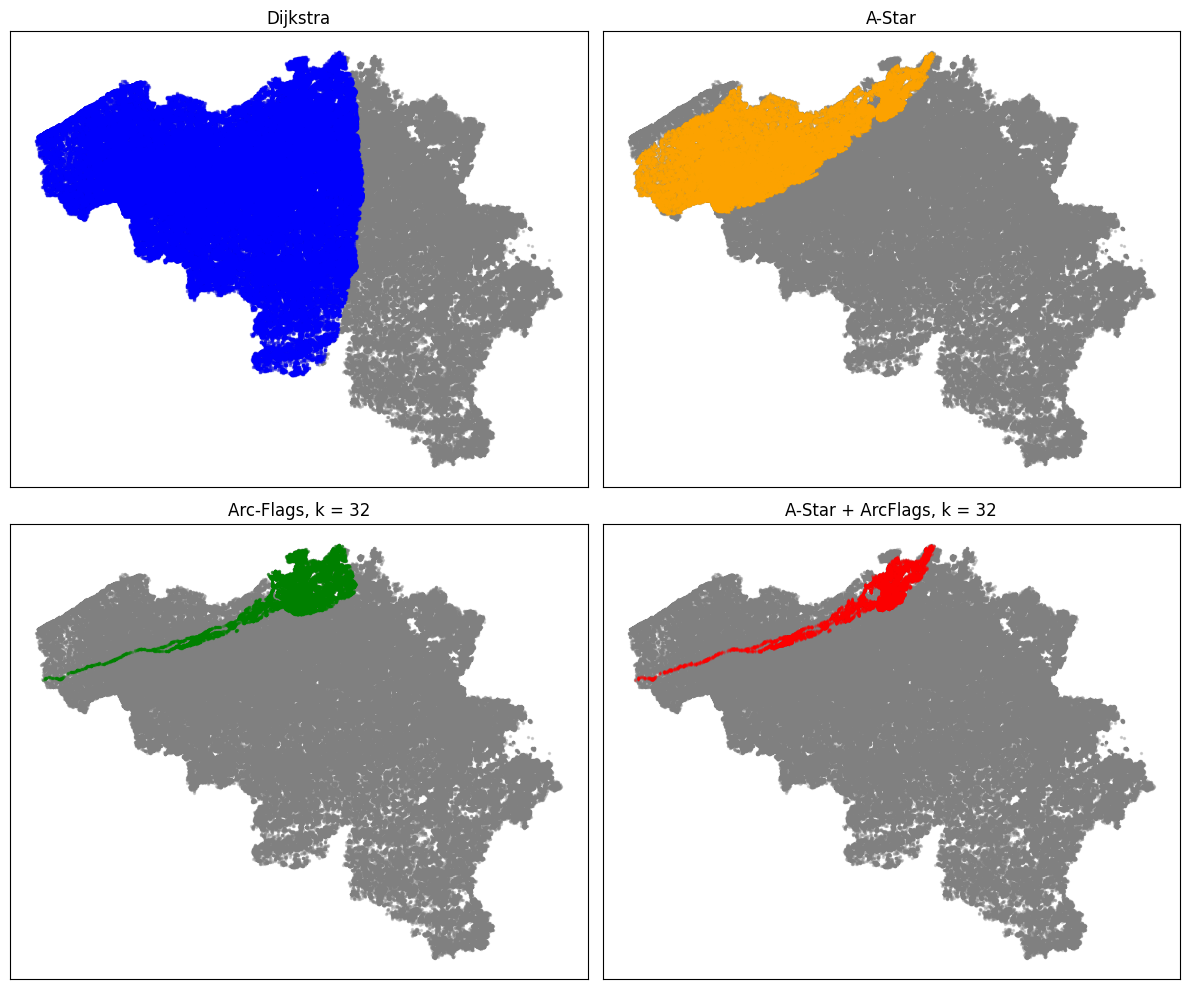

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Provide the file paths
coordinates_file_path = '~/practical/graph/bel.graph.xyz'
algorithm1_explored_nodes_file_path = '~/practical/plot/Dijkstra68636to24699'
algorithm2_explored_nodes_file_path = '~/practical/plot/AStarDijkstra68636to24699'
algorithm3_explored_nodes_file_path = '~/practical/plot/ArcFlagsDijkstra68636to24699'
algorithm4_explored_nodes_file_path = '~/practical/plot/AStarArcFlagsDijkstra68636to24699'

# Expand the file paths
coordinates_file_path = os.path.expanduser(coordinates_file_path)
algorithm1_explored_nodes_file_path = os.path.expanduser(algorithm1_explored_nodes_file_path)
algorithm2_explored_nodes_file_path = os.path.expanduser(algorithm2_explored_nodes_file_path)
algorithm3_explored_nodes_file_path = os.path.expanduser(algorithm3_explored_nodes_file_path)
algorithm4_explored_nodes_file_path = os.path.expanduser(algorithm4_explored_nodes_file_path)

# Read the coordinates file
data = np.loadtxt(coordinates_file_path)
x_coords = data[:, 0]
y_coords = data[:, 1]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for Dijkstra
for ax in axs.flat:
    ax.scatter(x_coords, y_coords, color='gray', alpha=0.3, label='All Nodes, Belgium', s=2, zorder=1)

algorithm1_explored_nodes_data = np.loadtxt(algorithm1_explored_nodes_file_path)
algorithm1_explored_x_coords = algorithm1_explored_nodes_data[:, 0]
algorithm1_explored_y_coords = algorithm1_explored_nodes_data[:, 1]
axs[0, 0].scatter(algorithm1_explored_x_coords, algorithm1_explored_y_coords, color='blue', marker='s', alpha=0.3, label='Dijkstra', s=2, zorder=2)
axs[0, 0].set_title('Dijkstra')

# Scatter plot for A-Star
algorithm2_explored_nodes_data = np.loadtxt(algorithm2_explored_nodes_file_path)
algorithm2_explored_x_coords = algorithm2_explored_nodes_data[:, 0]
algorithm2_explored_y_coords = algorithm2_explored_nodes_data[:, 1]
axs[0, 1].scatter(algorithm2_explored_x_coords, algorithm2_explored_y_coords, color='orange', marker='^', alpha=0.3, label='A-Star', s=2, zorder=3)
axs[0, 1].set_title('A-Star')

# Scatter plot for Arc-Flags
algorithm3_explored_nodes_data = np.loadtxt(algorithm3_explored_nodes_file_path)
algorithm3_explored_x_coords = algorithm3_explored_nodes_data[:, 0]
algorithm3_explored_y_coords = algorithm3_explored_nodes_data[:, 1]
axs[1, 0].scatter(algorithm3_explored_x_coords, algorithm3_explored_y_coords, color='green', marker='o', alpha=0.3, label='Arc-Flags, k = 32', s=2, zorder=4)
axs[1, 0].set_title('Arc-Flags, k = 32')

# Scatter plot for A-Star + Arc-Flags
algorithm4_explored_nodes_data = np.loadtxt(algorithm4_explored_nodes_file_path)
algorithm4_explored_x_coords = algorithm4_explored_nodes_data[:, 0]
algorithm4_explored_y_coords = algorithm4_explored_nodes_data[:, 1]
axs[1, 1].scatter(algorithm4_explored_x_coords, algorithm4_explored_y_coords, color='red', marker='d', alpha=0.3, label='A-Star + ArcFlags, k = 32', s=2, zorder=5)
axs[1, 1].set_title('A-Star + ArcFlags, k = 32')

# Remove x and y-axis labels from all subplots
for ax in axs.flat:
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


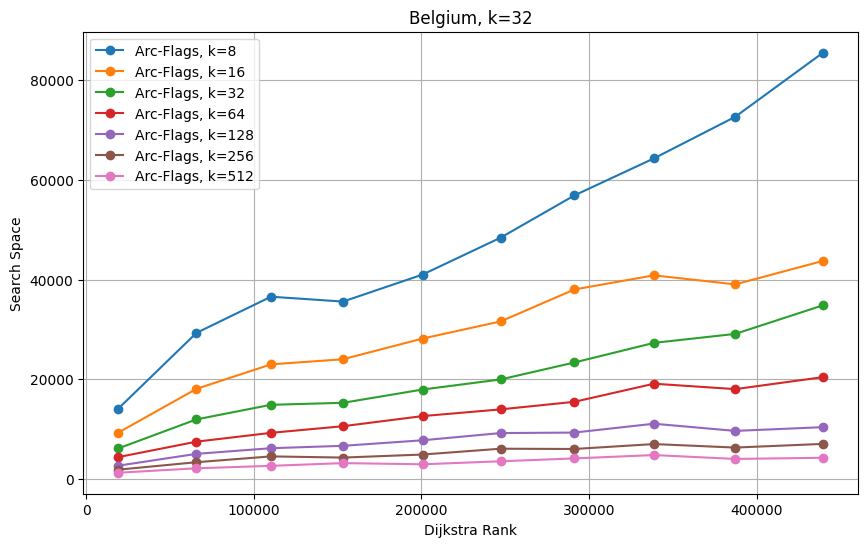

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
algorithms = ['Dijkstra', 'Arc-Flags, k=8', 'Arc-Flags, k=16', 'Arc-Flags, k=32', 'Arc-Flags, k=64', 'Arc-Flags, k=128', 'Arc-Flags, k=256', 'Arc-Flags, k=512' ]
file_paths = [
    '~/practical/result/random1000belDijkstra8',
    '~/practical/result/random1000belArcFlagsDijkstra8',
    '~/practical/result/random1000belArcFlagsDijkstra16',
    '~/practical/result/random1000belArcFlagsDijkstra32',
    '~/practical/result/random1000belArcFlagsDijkstra64',
    '~/practical/result/random1000belArcFlagsDijkstra128',
    '~/practical/result/random1000belArcFlagsDijkstra256',
    '~/practical/result/random1000belArcFlagsDijkstra512'
]

# Load data from the files
data = []
for path in file_paths:
    full_path = os.path.expanduser(path)
    algorithm_data = np.loadtxt(full_path)  # Replace with your data loading code
    data.append(algorithm_data)

# Extract Rank and Query Times
rank = data[0][:, 0]
query_times = [algorithm_data[:, 0] for algorithm_data in data]

# Create 2D arrays for each algorithm with Rank as X and Query Time as Y
arrays = [np.array([rank, query_time]) for query_time in query_times]

# Sort arrays by Rank (X values)
sorted_arrays = [array[:, array[0].argsort()] for array in arrays]

# Average every 100 steps for each algorithm
averaged_arrays = [np.mean(sorted_array[:, :len(sorted_array[0]) // 100 * 100].reshape(2, -1, 100), axis=2)
                   for sorted_array in sorted_arrays]

# Plot averaged data for selected algorithms on the same line plot
plt.figure(figsize=(10, 6))
plt.title('Belgium, k=32')
plt.xlabel('Dijkstra Rank')
plt.ylabel('Search Space')

# Plot each algorithm (excluding the first) with a different color and connect the points
for i in range(1, len(algorithms)):
    plt.plot(averaged_arrays[i][0], averaged_arrays[i][1], label=algorithms[i], marker='o')

plt.legend()
plt.grid(True)
plt.show()


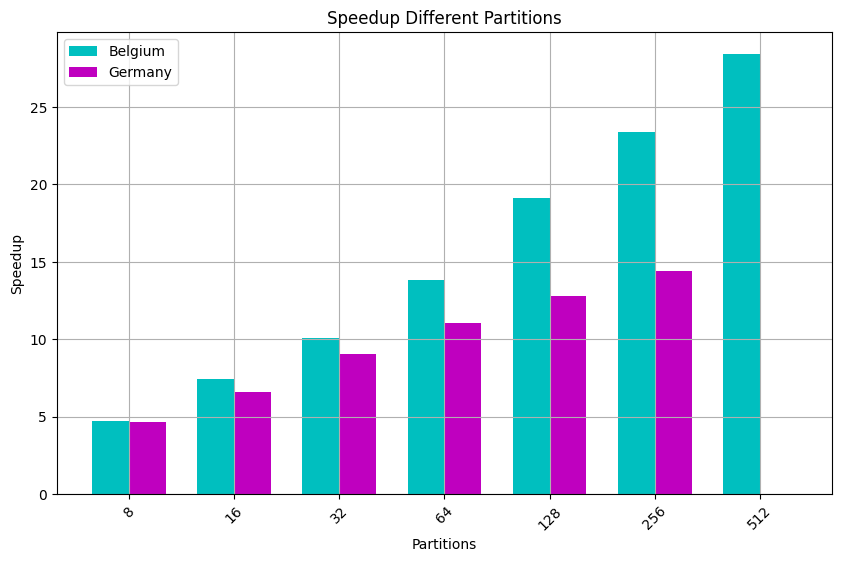

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
algorithms = ['Dijkstra8', 'ArcFlagsDijkstra8', 'ArcFlagsDijkstra16', 'ArcFlagsDijkstra32', 'ArcFlagsDijkstra64', 'ArcFlagsDijkstra128', 'ArcFlagsDijkstra256', 'ArcFlagsDijkstra512']
file_paths = [
    '~/practical/result/random1000belDijkstra8',
    '~/practical/result/random1000belArcFlagsDijkstra8',
    '~/practical/result/random1000belArcFlagsDijkstra16',
    '~/practical/result/random1000belArcFlagsDijkstra32',
    '~/practical/result/random1000belArcFlagsDijkstra64',
    '~/practical/result/random1000belArcFlagsDijkstra128',
    '~/practical/result/random1000belArcFlagsDijkstra256',
    '~/practical/result/random1000belArcFlagsDijkstra512'
]

file_paths2 = [
    '~/practical/result/random1000deuDijkstra8',
    '~/practical/result/random1000deuArcFlagsDijkstra8',
    '~/practical/result/random1000deuArcFlagsDijkstra16',
    '~/practical/result/random1000deuArcFlagsDijkstra32',
    '~/practical/result/random1000deuArcFlagsDijkstra64',
    '~/practical/result/random1000deuArcFlagsDijkstra128',
    '~/practical/result/random1000deuArcFlagsDijkstra256'
]

# Load data from the files for file_paths
data = []
for path in file_paths:
    full_path = os.path.expanduser(path)
    algorithm_data = np.loadtxt(full_path)
    data.append(algorithm_data)

# Load data from the files for file_paths2
data2 = []
for path in file_paths2:
    full_path = os.path.expanduser(path)
    algorithm_data = np.loadtxt(full_path)
    data2.append(algorithm_data)

# Extract partitions and query times from all files for file_paths
partitions = [8, 16, 32, 64, 128, 256, 512]
query_times = [algorithm_data[:, 1] for algorithm_data in data]
query_times2 = [algorithm_data[:, 1] for algorithm_data in data2]

# Calculate average query times for each input file for file_paths
averaged_query_times = [np.mean(query_time) for query_time in query_times]
averaged_query_times2 = [np.mean(query_time) for query_time in query_times2]

# Calculate speedup data using baseline of the first file's query average for file_paths
speedup_data = []
for i in range(1, len(algorithms)):
    query_times_baseline = averaged_query_times[0]
    query_times_current = averaged_query_times[i]
    speedup = query_times_baseline / query_times_current
    speedup_data.append(speedup)

# Calculate speedup data using baseline of the first file's query average for file_paths2
speedup_data2 = []
for i in range(1, len(algorithms) - 1):
    query_times_baseline = averaged_query_times2[0] 
    query_times_current = averaged_query_times2[i]
    speedup = query_times_baseline / query_times_current
    speedup_data2.append(speedup)

speedup_data2.append(0)
# Plot speedup data for selected algorithms as a bar graph
plt.figure(figsize=(10, 6))
plt.title('Speedup Different Partitions')
plt.xlabel('Partitions')
plt.ylabel('Speedup')

# Create x locations for the bars
x = np.arange(len(algorithms) -1)

# Width of the bars
width = 0.35

# Plot the bars for file_paths and file_paths2 side by side
plt.bar(x - width/2, speedup_data, width, label='Belgium', color='c', align='center')
plt.bar(x + width/2, speedup_data2, width, label='Germany', color='m', align='center')

# Set x-axis tick labels
plt.xticks(x, partitions, rotation=45)

# Add a legend
plt.legend()

plt.grid(True)
plt.show()


In [2]:
import os
# Define a function to calculate the percentage of 1's in a line
def calculate_percentage(line):
    total_digits = len(line)
    ones_count = line.count('1')
    percentage = (ones_count / total_digits) * 100
    return percentage

# List of file paths (replace with your file paths)
file_paths = ['~/practical/graph/deu.graph.part8.arcfl',
              '~/practical/graph/deu.graph.part16.arcfl',
              '~/practical/graph/deu.graph.part32.arcfl',
              '~/practical/graph/deu.graph.part64.arcfl',
              '~/practical/graph/deu.graph.part128.arcfl',
              '~/practical/graph/deu.graph.part256.arcfl'
              # Add more file paths here
              ]

for file_path in file_paths:
    # Expand the tilde character to the user's home directory
    file_path = os.path.expanduser(file_path)
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            total_lines = 0
            total_percentage = 0

            # Read each line in the file
            for line in file:
                line = line.strip()  # Remove leading/trailing whitespace
                if line:  # Check if the line is not empty
                    total_lines += 1
                    percentage = calculate_percentage(line)
                    total_percentage += percentage

            # Calculate the average percentage across all lines in the current file
            if total_lines > 0:
                average_percentage = total_percentage / total_lines
                print(f"File: {file_path}, Average Percentage of 1's: {average_percentage:.2f}%")
            else:
                print(f"File: {file_path}, No data found in the file.")
    else:
        print(f"File not found: {file_path}")


File: /home/malid/practical/graph/deu.graph.part8.arcfl, Average Percentage of 1's: 56.29%
File: /home/malid/practical/graph/deu.graph.part16.arcfl, Average Percentage of 1's: 51.45%
File: /home/malid/practical/graph/deu.graph.part32.arcfl, Average Percentage of 1's: 47.71%
File: /home/malid/practical/graph/deu.graph.part64.arcfl, Average Percentage of 1's: 45.38%
File: /home/malid/practical/graph/deu.graph.part128.arcfl, Average Percentage of 1's: 43.75%
File: /home/malid/practical/graph/deu.graph.part256.arcfl, Average Percentage of 1's: 42.64%


In [3]:
import os

# Function to calculate the average query time from a file
def calculate_average_query_time(path):
    file_path = os.path.expanduser(path)
    total_query_time = 0
    total_queries = 0

    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    query_time = float(line.split()[1])  # Assuming query time is in the second column
                    query_time = query_time / 1000
                    total_query_time += query_time
                    total_queries += 1
                except (ValueError, IndexError):
                    continue  # Skip lines with invalid data

        if total_queries > 0:
            average_query_time = total_query_time / total_queries
            return average_query_time
        else:
            return None  # No valid query times found in the file

    except FileNotFoundError:
        return None  # File not found

# List of file paths (replace with your file paths)
file_paths = [
    '~/practical/result/random1000deuDijkstra8',
    '~/practical/result/random1000deuAStarDijkstra8',
    '~/practical/result/random1000deuArcFlagsDijkstra8',
    '~/practical/result/random1000deuArcFlagsDijkstra16',
    '~/practical/result/random1000deuArcFlagsDijkstra32',
    '~/practical/result/random1000deuArcFlagsDijkstra64',
    '~/practical/result/random1000deuArcFlagsDijkstra128',
    '~/practical/result/random1000deuArcFlagsDijkstra256',
    '~/practical/result/random1000deuArcFlagsDijkstra512'
]

for file_path in file_paths:
    average_query_time = calculate_average_query_time(file_path)
    if average_query_time is not None:
        print(f"File: {file_path}, Average Query Time: {average_query_time:.2f} ms")
    else:
        print(f"File: {file_path}, No valid query times found or file not found.")


File: ~/practical/result/random1000deuDijkstra8, Average Query Time: 703.87 ms
File: ~/practical/result/random1000deuAStarDijkstra8, Average Query Time: 175.33 ms
File: ~/practical/result/random1000deuArcFlagsDijkstra8, Average Query Time: 150.67 ms
File: ~/practical/result/random1000deuArcFlagsDijkstra16, Average Query Time: 106.49 ms
File: ~/practical/result/random1000deuArcFlagsDijkstra32, Average Query Time: 77.72 ms
File: ~/practical/result/random1000deuArcFlagsDijkstra64, Average Query Time: 63.61 ms
File: ~/practical/result/random1000deuArcFlagsDijkstra128, Average Query Time: 55.05 ms
File: ~/practical/result/random1000deuArcFlagsDijkstra256, Average Query Time: 48.88 ms
File: ~/practical/result/random1000deuArcFlagsDijkstra512, No valid query times found or file not found.


In [4]:
def seconds_to_hms(seconds):
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

# List of seconds
seconds_list = [832, 2256, 4261, 7233, 10885, 18509]

for seconds in seconds_list:
    hms = seconds_to_hms(seconds)
    print(hms)


00:13:52
00:37:36
01:11:01
02:00:33
03:01:25
05:08:29
